# Grid Search Parameter Tuning and Pipeline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sn
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import HelpfulFunctions as hp

## Supervised Learning PCA: Wisconsin Breast Cancer Dataset

In [3]:
from sklearn.datasets import load_breast_cancer
breastCancerData = load_breast_cancer()
df = pd.DataFrame(breastCancerData['data'],columns = breastCancerData['feature_names'])
y = breastCancerData['target']

### Standardising the Data

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [7]:
model = SVC(gamma = "auto")
model.fit(X_train,y_train)

SVC(gamma='auto')

In [11]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
print(cm)

[[ 63   3]
 [  1 104]]


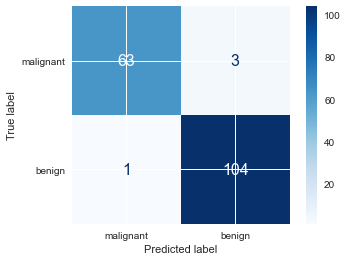

In [12]:
hp.plot_cm(model, X_test, y_test, ['malignant','benign'])

## Using Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
parameters = {'C':[0.01,0.1,1,10], 'gamma':[0.0000001, 0.000001,0.0001,0.001], 'kernel':['linear','rbf','sigmoid']}

In [15]:
grid = GridSearchCV(SVC(probability = True), parameters, verbose=2) 
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .................C=0.01, gamma=1e-07, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=1e-07, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=1e-07, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=1e-07, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=1e-07, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END ................C=0.01, gamma=1e-07, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.01, gamma=1e-07, k

[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=1e-07, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=1e-07, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=1e-07, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=1e-07, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=1e-07, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [1e-07, 1e-06, 0.0001, 0.001],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=2)

In [16]:
grid.best_params_

{'C': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}

In [17]:
model = SVC(kernel='linear',gamma=1e-5,C=0.1)
model.fit(X_train,y_train)

SVC(C=0.1, gamma=1e-05, kernel='linear')

In [20]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
print(cm)

[[ 62   4]
 [  0 105]]


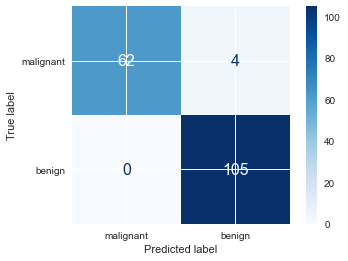

In [21]:
hp.plot_cm(model, X_test, y_test, ['malignant','benign'])

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        66
           1       0.96      1.00      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



## Using a Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [24]:
pip_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=3)),('clf', LogisticRegression(random_state=1, solver='lbfgs'))])

In [25]:
pip_lr.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=3)),
                ('clf', LogisticRegression(random_state=1))])

In [26]:
print('Test Accuracy: %.3f' %pip_lr.score(X_test, y_test))

Test Accuracy: 0.947
